## Toyota 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toy = pd.read_csv("ToyotaCorolla.csv",encoding = 'latin2')
toy

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### EDA

In [3]:
#pick only these columns("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")
toyo = toy[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyo

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
toyo1 = toyo.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"}, axis = 1)
toyo1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyo1.head(11)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [6]:
toyo1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [7]:
toyo1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyo1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
toyo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
toyo1.isnull()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [11]:
toyo1[toyo1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
toyo2 = toyo1.drop_duplicates().reset_index(drop=True)
toyo2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


### Model Building

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = toyo2).fit()
model


In [15]:
# Finding rsquared values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:45:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
## checking(finding) R-square and Adjusted R-square

model.rsquared, model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [17]:
## checking(finding) t-values and p-values

model.tvalues, model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 Weight       15.760663
 HP           11.209719
 CC           -1.316436
 Gears         3.034563
 QT            2.944198
 Doors        -0.023012
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 Weight        1.031118e-51
 HP            5.211155e-28
 CC            1.882393e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Doors         9.816443e-01
 dtype: float64)

Build SLR and MLR models for insignificant variables 'CC' and 'Doors', Also find their tvalues and pvalues

In [18]:
slr_c = smf.ols('Price~CC',data=toyo2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [19]:
slr_c=smf.ols('Price~Doors',data=toyo2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [20]:
slr_c=smf.ols('Price~CC+Doors',data=toyo2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [21]:
slr_c=smf.ols('Price~CC+Doors',data=toyo2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

### Model Validation Techniques
#### By using 1) Collinearity Check 2) Residual Check

In [22]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
# take all independent variables alternatively and put at a place of (depenedent ~ independent) and chaeking data

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo2).fit().rsquared
vif_GR = 1/(1-rsq_GR)

rsq_QT = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_WT = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo2).fit().rsquared
vif_WT = 1/(1-rsq_WT)

# Putting the values in Dataframe format
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

Residuals Analysis by q-q Plot

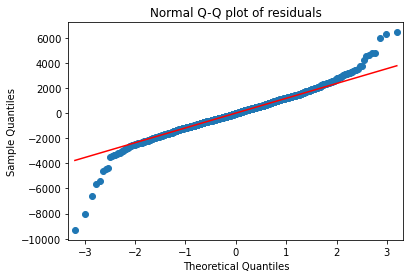

In [23]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
# outliar detection from above QQ plot of residuals

list(np.where(model.resid>4000)), list(np.where(model.resid<-4000))

([array([ 109,  110,  111,  124,  146,  170,  522, 1057])],
 [array([190, 191, 220, 392, 401, 600, 653, 959])])

In [25]:
list(np.where(model.resid>6000)), list(np.where(model.resid<-6000))

([array([109, 146, 522])], [array([220, 600, 959])])

In [26]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standard_values(vals): 
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

In [27]:
model.fittedvalues, model.resid

(0       16791.958871
 1       16253.800414
 2       16779.635210
 3       16405.789389
 4       16200.217277
             ...     
 1430     8794.255037
 1431     8292.577342
 1432     8455.434402
 1433     8579.222041
 1434    10396.087526
 Length: 1435, dtype: float64,
 0      -3291.958871
 1      -2503.800414
 2      -2829.635210
 3      -1455.789389
 4      -2450.217277
            ...     
 1430   -1294.255037
 1431    2552.422658
 1432      44.565598
 1433   -1329.222041
 1434   -3446.087526
 Length: 1435, dtype: float64)

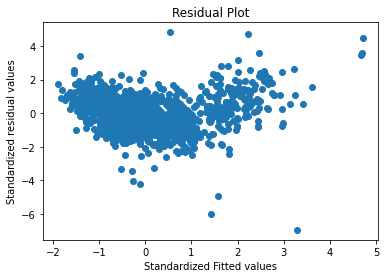

In [28]:
# checking similarity(relationship) by use of scatter plot

plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [29]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

eval_env: 1


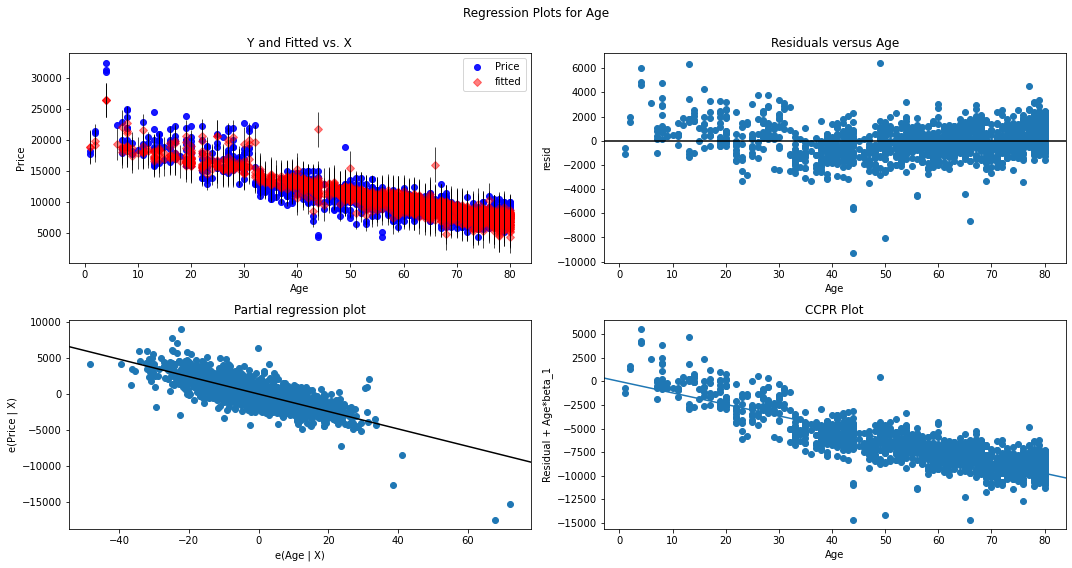

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


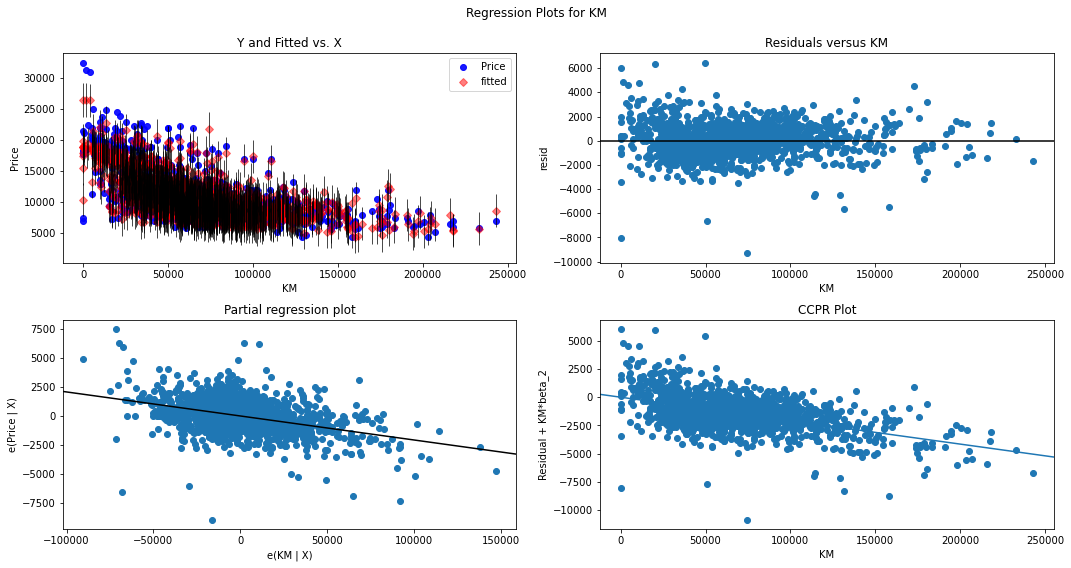

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


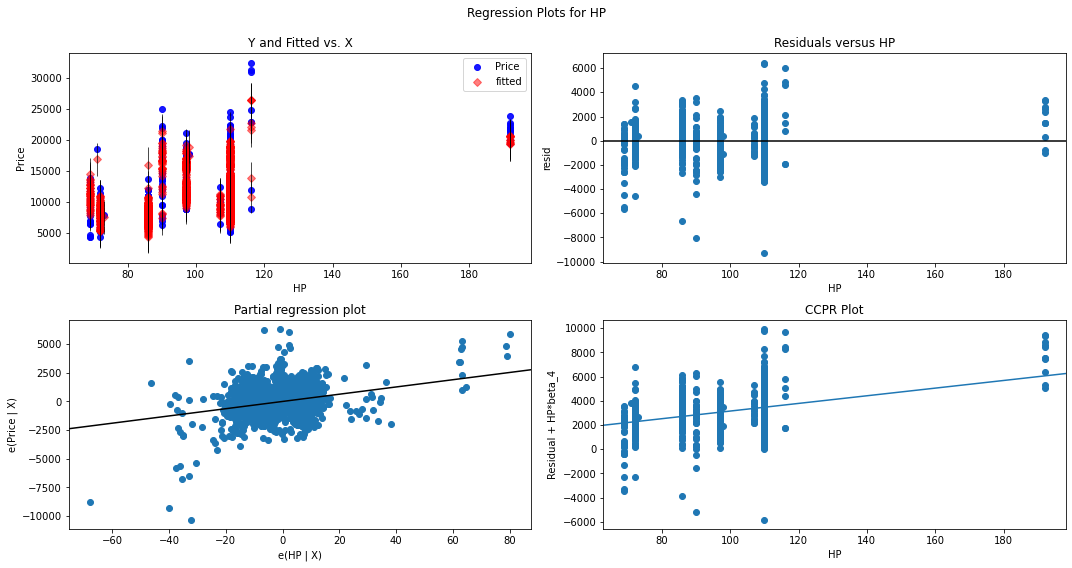

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


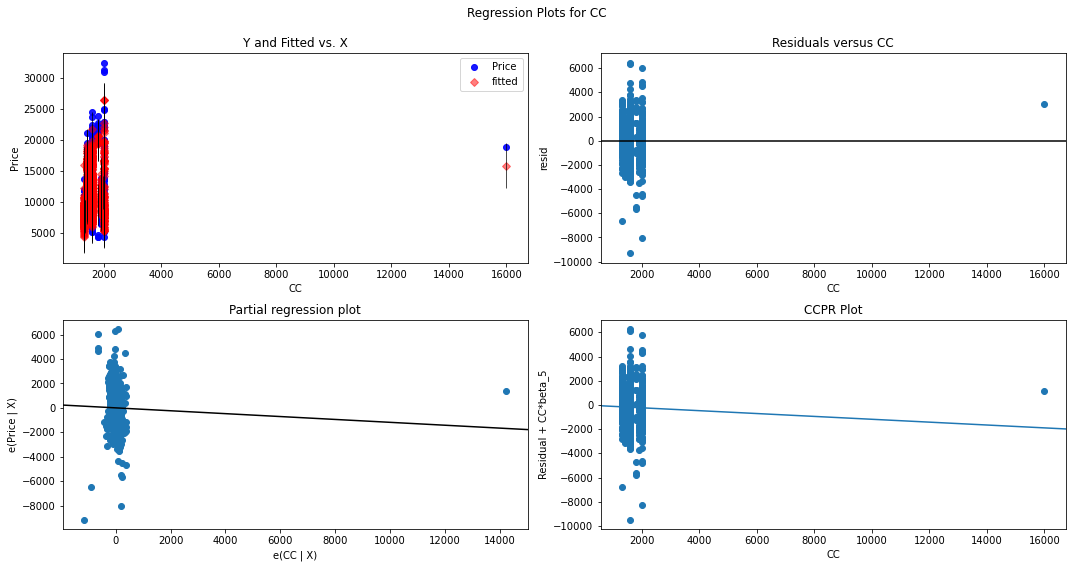

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


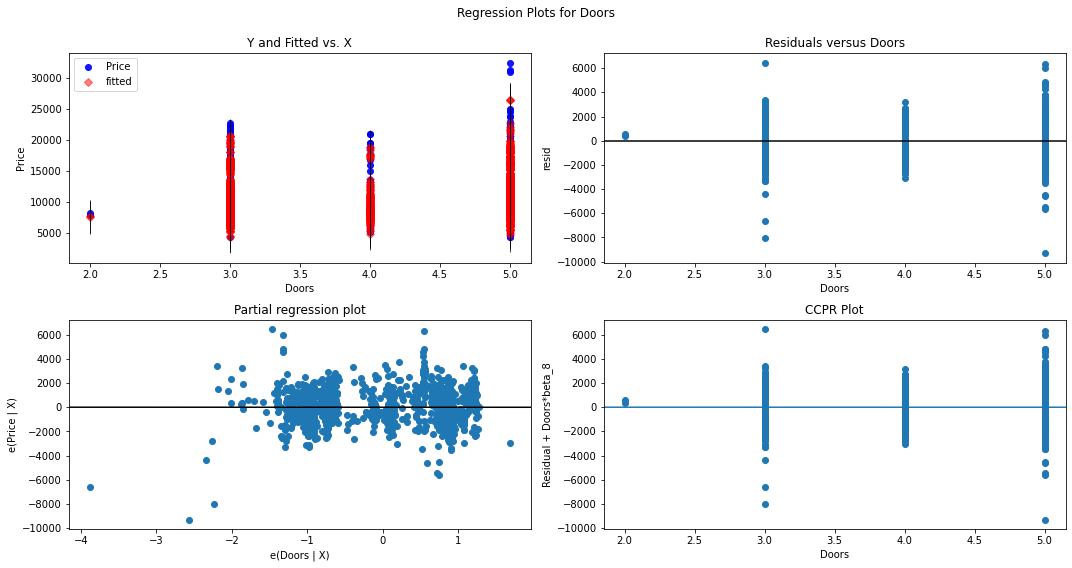

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


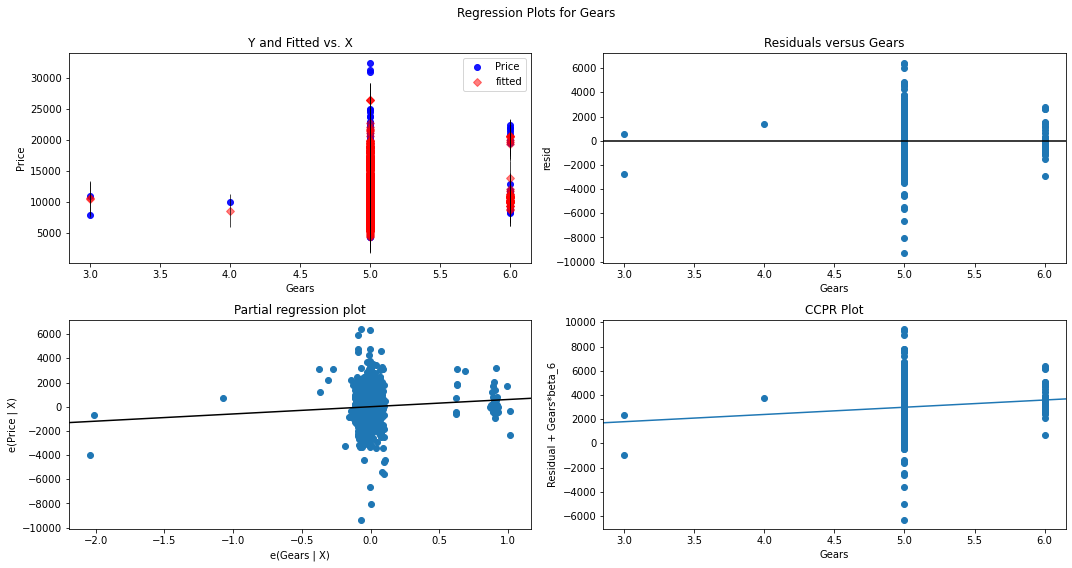

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


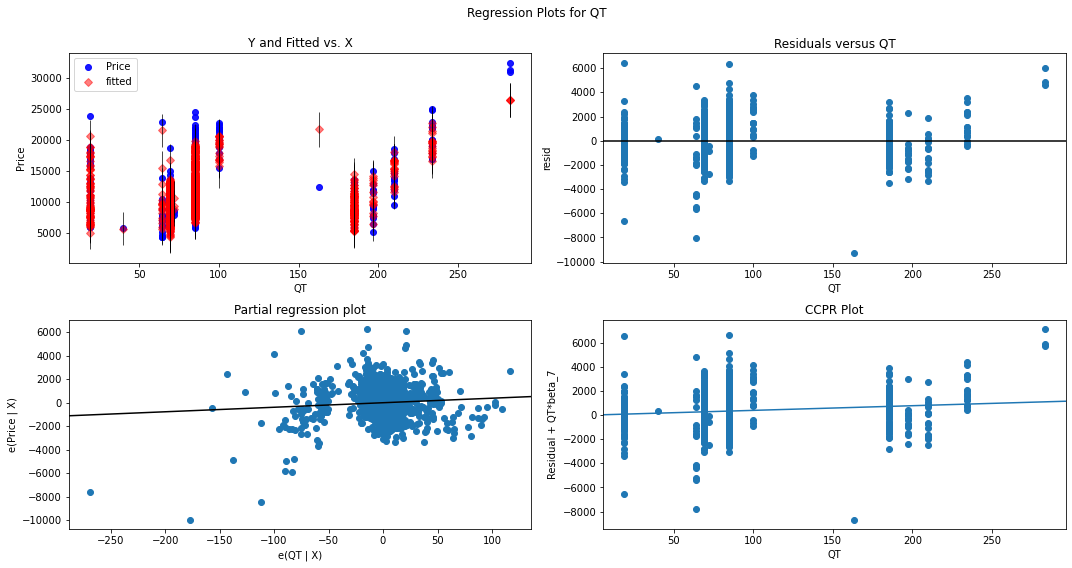

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


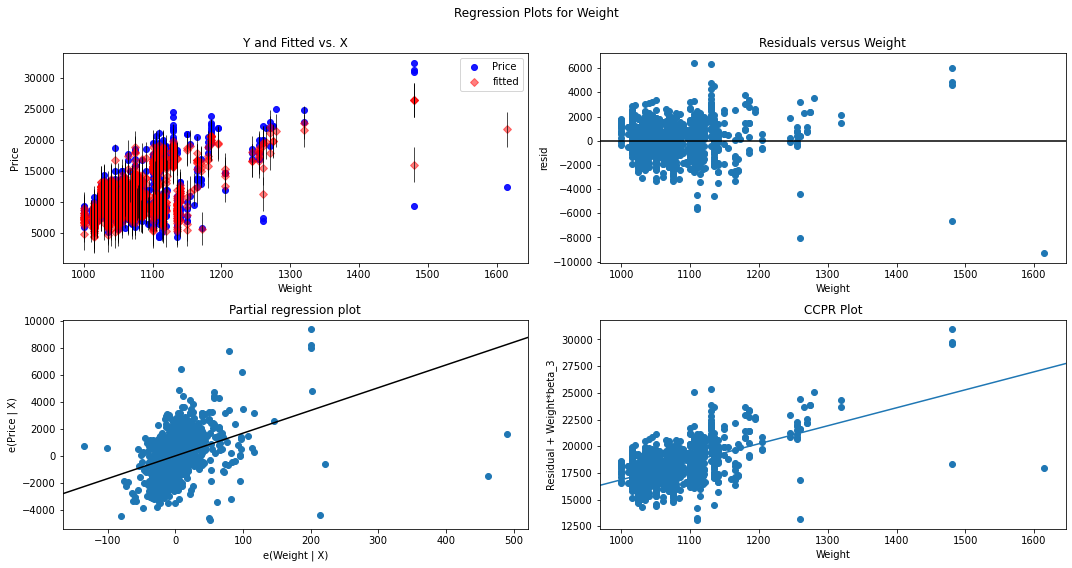

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

### Checking Outliers and Ifluencers
#### Two Techniques: 1. Cook's Distance and 2. Leverage value

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

In [39]:
# 1. cook's distance: If cook's distance is > 1, then it is an outlier
# get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

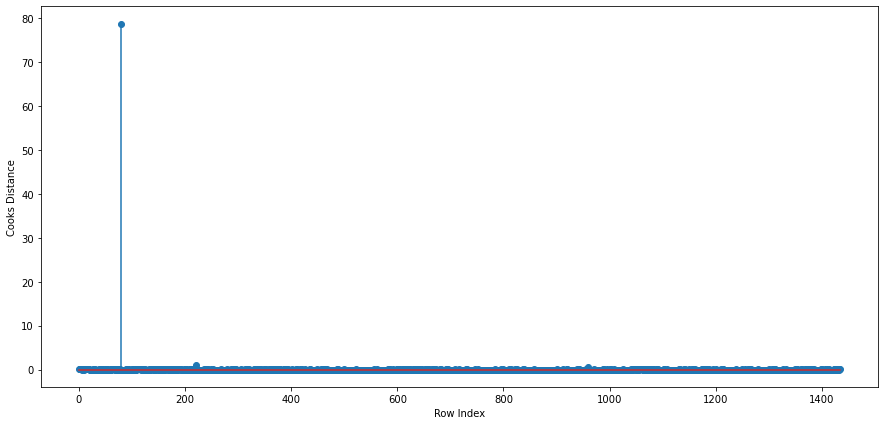

In [40]:
# plot the influencers using the stem plot
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(toyo2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
# Index and value of influencer where C>0.5
np.argmax(c), np.max(c)

(80, 78.72950582249169)

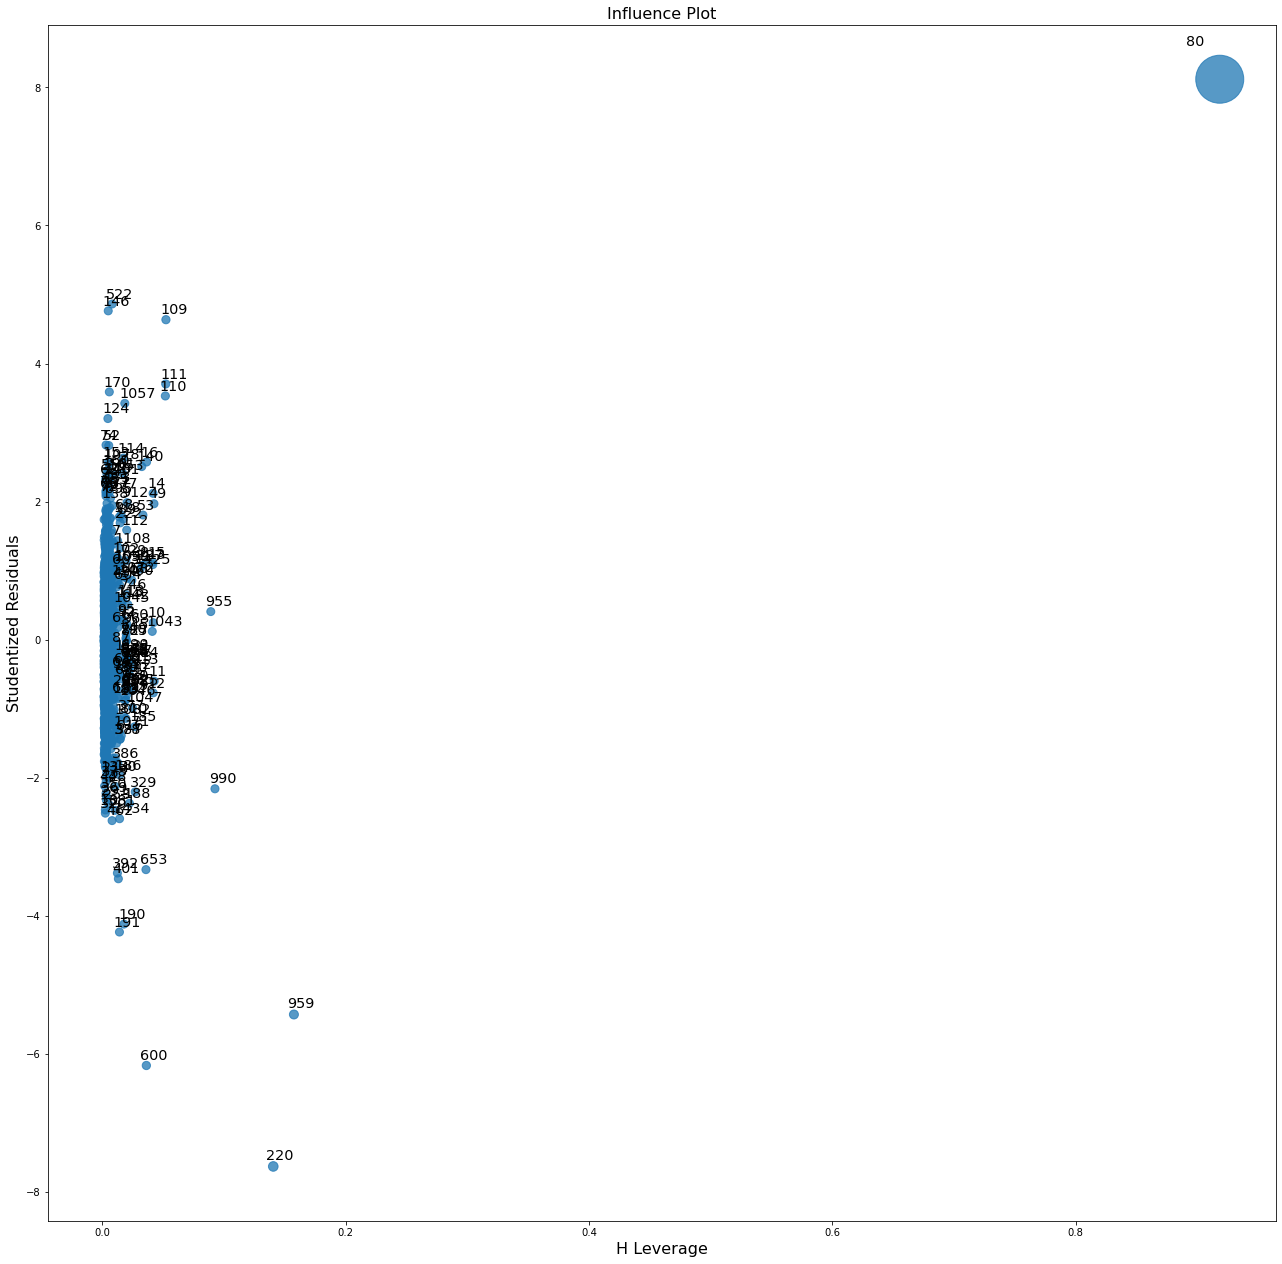

In [42]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(22,22))
fig=influence_plot(model,ax = ax)

In [43]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo2.shape[1]
n=toyo2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [44]:
toyo2[toyo2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [45]:
# Creating a copy of data so that original dataset is not affected
toyota = toyo2.copy()
toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [46]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Toyota =toyota.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
Toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Model Predictions

In [47]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':15,"KM":40001,"HP":80,"CC":1310,"Doors":9,"Gears":8,"QT":88,"Weight":1015},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,15,40001,80,1310,9,8,88,1015


In [48]:
# manula prediction of price
model.predict(new_data)

0    16465.011806
dtype: float64

In [49]:
# Automatic Prediction of model
pred_y = model.predict(Toyota)
pred_y

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1429     8794.255037
1430     8292.577342
1431     8455.434402
1432     8579.222041
1433    10396.087526
Length: 1434, dtype: float64

In [50]:
Toyota["Price Prediction"] = pred_y
Toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price Prediction
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277
...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041


## 50 Start_ups

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [52]:
start_up = pd.read_csv("50_Startups.csv")
start_up

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [53]:
start_up.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [55]:
start_up1 = start_up.rename({"R&D Spend":"RDS",
                             "Administration": "ADMS", 
                             "Marketing Spend": "MKTS"}, 
                            axis=1)
start_up1


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
start_up1.head(11)

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [57]:
start_up1[start_up1.duplicated()]   #No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [58]:
start_up1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [59]:
start_up1.corr()    #correlation analysis

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


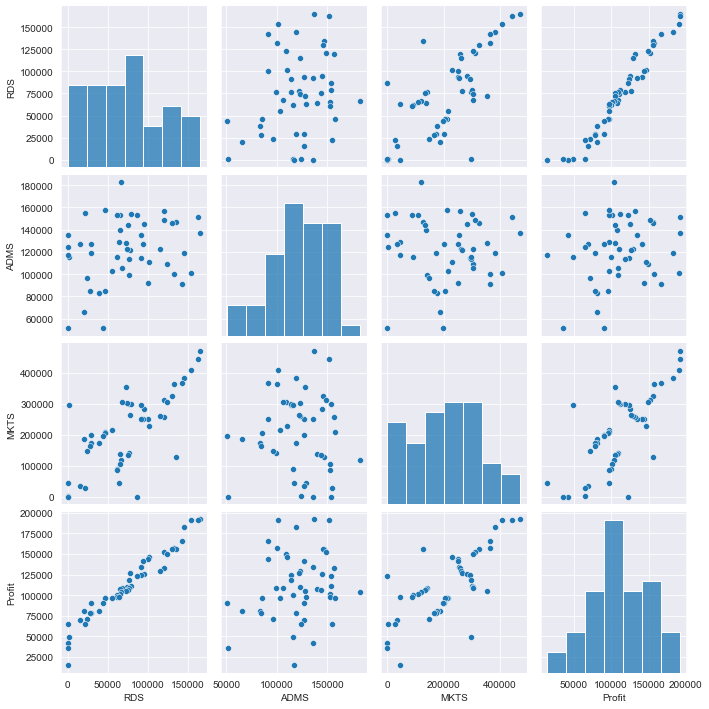

In [60]:
sns.set_style(style = 'darkgrid')
sns.pairplot(start_up1)

### Model Building

In [61]:
my_model = smf.ols("Profit~RDS+ADMS+MKTS", data = start_up1).fit()

In [62]:
my_model.params       #Testing model

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [63]:
print( f"t_values of my model are:", my_model.tvalues)
print(f"p values of my model are:",np.round(my_model.pvalues,5) )   # finding p and t values

t_values of my model are: Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64
p values of my model are: Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTS         0.10472
dtype: float64


In [64]:
# Finding rsquared values
print(f"R Squared value of my model is:", my_model.rsquared) 
print(f"Adjusted R_squared value of my model is:", my_model.rsquared_adj)

R Squared value of my model is: 0.9507459940683246
Adjusted R_squared value of my model is: 0.9475337762901719


### Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
### Also find their tvalues and pvalues

In [65]:
smpl_lnr_a = smf.ols("Profit~ADMS", data = start_up1).fit()
print(f"t values of simple linear regression model are:",smpl_lnr_a.tvalues)
print(f"p values of simple linear regression model are:", smpl_lnr_a.pvalues)
# ADMS has in-significant pvalue

t values of simple linear regression model are: Intercept    3.040044
ADMS         1.419493
dtype: float64
p values of simple linear regression model are: Intercept    0.003824
ADMS         0.162217
dtype: float64


In [66]:
smpl_lnr_m = smf.ols("Profit~MKTS", data = start_up1).fit()
print(f"t values of simple linear regression model are:", smpl_lnr_m.tvalues)
print(f"p values of simple linear regression model are:", smpl_lnr_m.pvalues)
# MKTS has significant pvalue

t values of simple linear regression model are: Intercept    7.808356
MKTS         7.802657
dtype: float64
p values of simple linear regression model are: Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [67]:
mltpl_lnr = smf.ols("Profit~ADMS+MKTS", data = start_up1).fit()
print(f"t values of multiple linear regression are:", mltpl_lnr.tvalues)
print(f"p values of multiple linear regression are:", mltpl_lnr.pvalues)
# varaibles have significant pvalues

t values of multiple linear regression are: Intercept    1.142741
ADMS         2.467779
MKTS         8.281039
dtype: float64
p values of multiple linear regression are: Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64


## Model Validation
### Two Techniques: 1. Collinearity Check & 
###                             2. Residual Analysis

In [68]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols("RDS~ ADMS+MKTS", data = start_up1).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols("ADMS~RDS+MKTS", data = start_up1).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols("MKTS~RDS+ADMS", data = start_up1).fit().rsquared
vif_m = 1/(1-rsq_m)



In [69]:
# Putting the values in Dataframe format
df ={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(df)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


#### None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

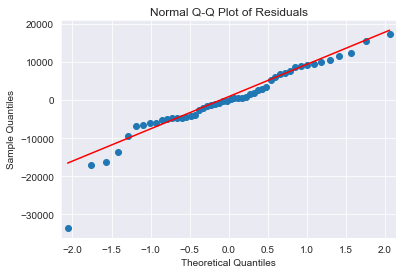

In [70]:
# 2) Residual Analysis 
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(my_model.resid, line = 'q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [71]:
list(np.where(my_model.resid<-30000))

[array([49])]

### Test for Homoscedasticity or Hetroscadasticity (Plotting model's standardized fitted values vs standardized residual values)

In [72]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std()
# User defined z = (x - mu)/sigma

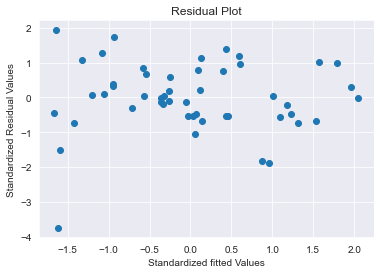

In [73]:
plt.scatter(standard_values(my_model.fittedvalues), standard_values(my_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


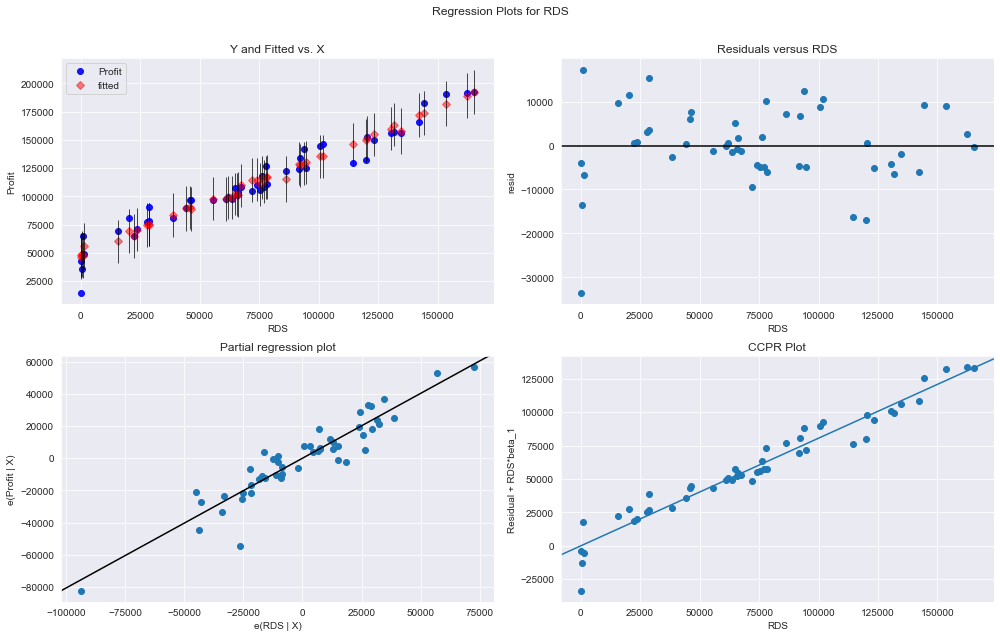

In [74]:
fig = plt.figure(figsize=(14,9))
sm.graphics.plot_regress_exog(my_model, 'RDS', fig=fig)
plt.show()

eval_env: 1


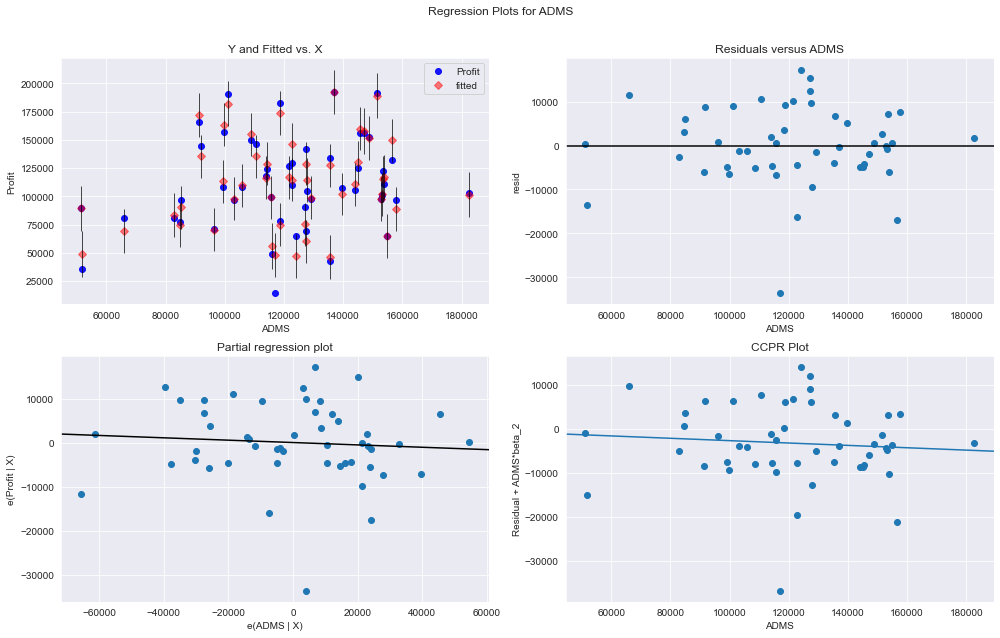

In [75]:
fig = plt.figure(figsize=(14,9))
sm.graphics.plot_regress_exog(my_model, 'ADMS', fig = fig)
plt.show()

eval_env: 1


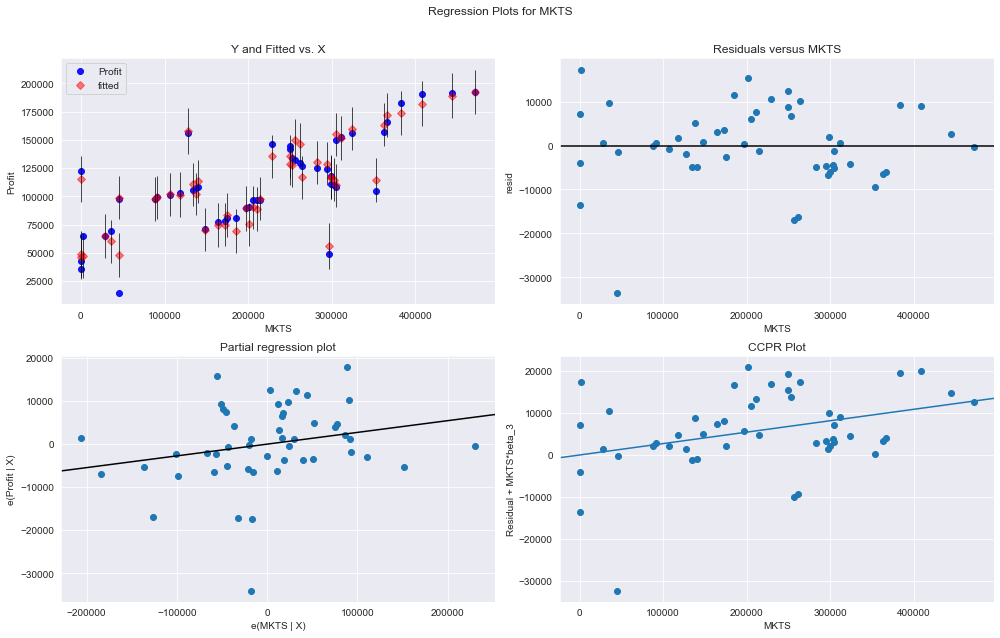

In [76]:
fig = plt.figure(figsize=(14,9))
sm.graphics.plot_regress_exog(my_model, 'MKTS', fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
## Two Techniques : 1. Cook's Distance & 2. Leverage value

In [77]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_) = my_model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

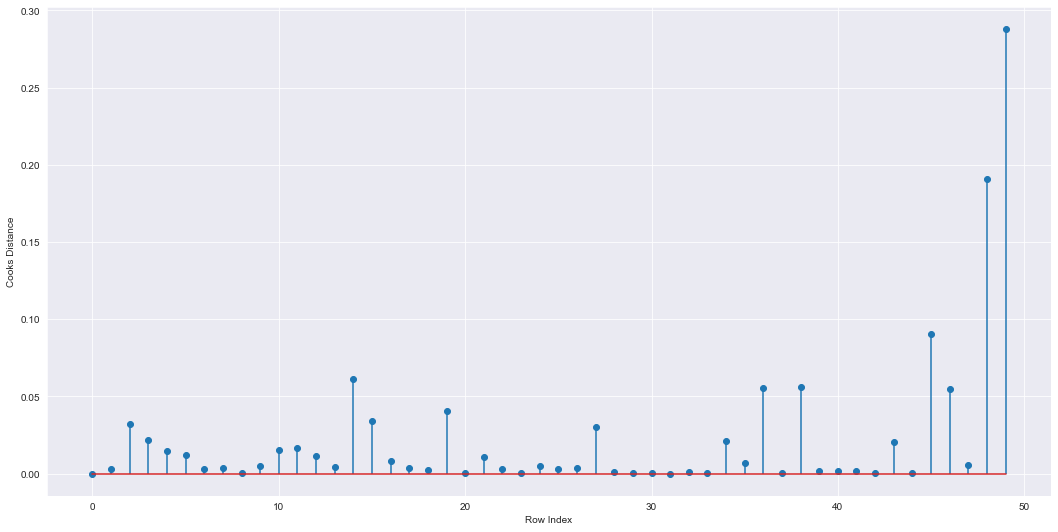

In [78]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize = (18,9))
plt.stem(np.arange(len(start_up1)), np.round(c,7))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
# Index and Value of influencer where C>0.5 
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

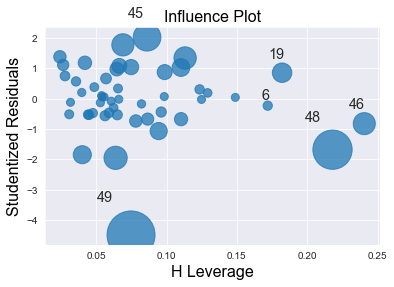

In [80]:
# 2. Leverage value using High Influence Points: 
# Points beyond Leverage_cutoff value are influencers

influence_plot(my_model)
plt.show()

In [81]:
# Leverage Cutoff Value = 3*(k+1)/n ; k = no. of features/columns & n = no. of datapoints
k = start_up1.shape[1]
n = start_up1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [82]:
start_up1[start_up1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


### Improving the Model

In [83]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
start_up2 = start_up1.drop(start_up1.index[[49]], axis=0).reset_index(drop=True)
start_up2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [84]:
start_up2.head(10)

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Deletion Daignostics and Final Model

In [85]:
while np.max(c)>0.5:
    new_model = smf.ols("Profit~RDS+ADMS+MKTS", data = start_up2).fit()
    (c,_) = new_model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    start_up2 = start_up2.drop(start_up2.index[[np.argmax(c)]], axis = 0).reset_index(drop=True)
    start_up2
else:
    final_model = smf.ols("Profit~RDS+ADMS+MKTS", data = start_up2).fit()
    final_model.rsquared, final_model.aic
    print("Thus model accuracy is improved to", final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [86]:
final_model.rsquared

0.9613162435129847

In [87]:
start_up2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Prediction

In [88]:
# Say a New Data for prediction is:
new_data = pd.DataFrame({'RDS':70000, 'ADMS':90000,'MKTS':140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [89]:
final_model.predict(new_data)  #checking prediction 

0    108727.154753
dtype: float64

In [90]:
# Automatic Prediction of Price with 90.02% accuracy
pred_y = final_model.predict(start_up2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### Table containing R^2 value for each prepared model

In [91]:
final_data = {"Prep_Models":['Model','Final_Model'], "Rsquared": [my_model.rsquared, final_model.rsquared]}
table = pd.DataFrame(final_data)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
